In [1]:
#Suppressing warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
#reading the dataset
bike = pd.read_csv('day.csv')

In [4]:
#checking the shape of the data
bike.shape

(730, 16)

In [5]:
#checking the data we will be using
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#checking the info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### there are no null values in the data

In [7]:
#describing the data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# since the instance only shows the record index 
# dteday column does not give any meaninful insights, the info provided in the column is already covered in Yr, mnth
# casual and registered are combined as total in our target variable cnt
# so we can drop the columns
bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [9]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True) #renaming for readability

In [11]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# converting the values of 1,2,3,4... into categorical values for columns 'Season' 'Month' 'weekday' for better understanding 

bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['month'] = bike['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike['weekday'] = bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thurs',5:'fri',6:'sat'})
bike['weathersit']  = bike['weathersit'].map({1:'clear',2:'mist_cloudy',3:'light_rain_snow',4:'heavy_rain_snow'})

In [13]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


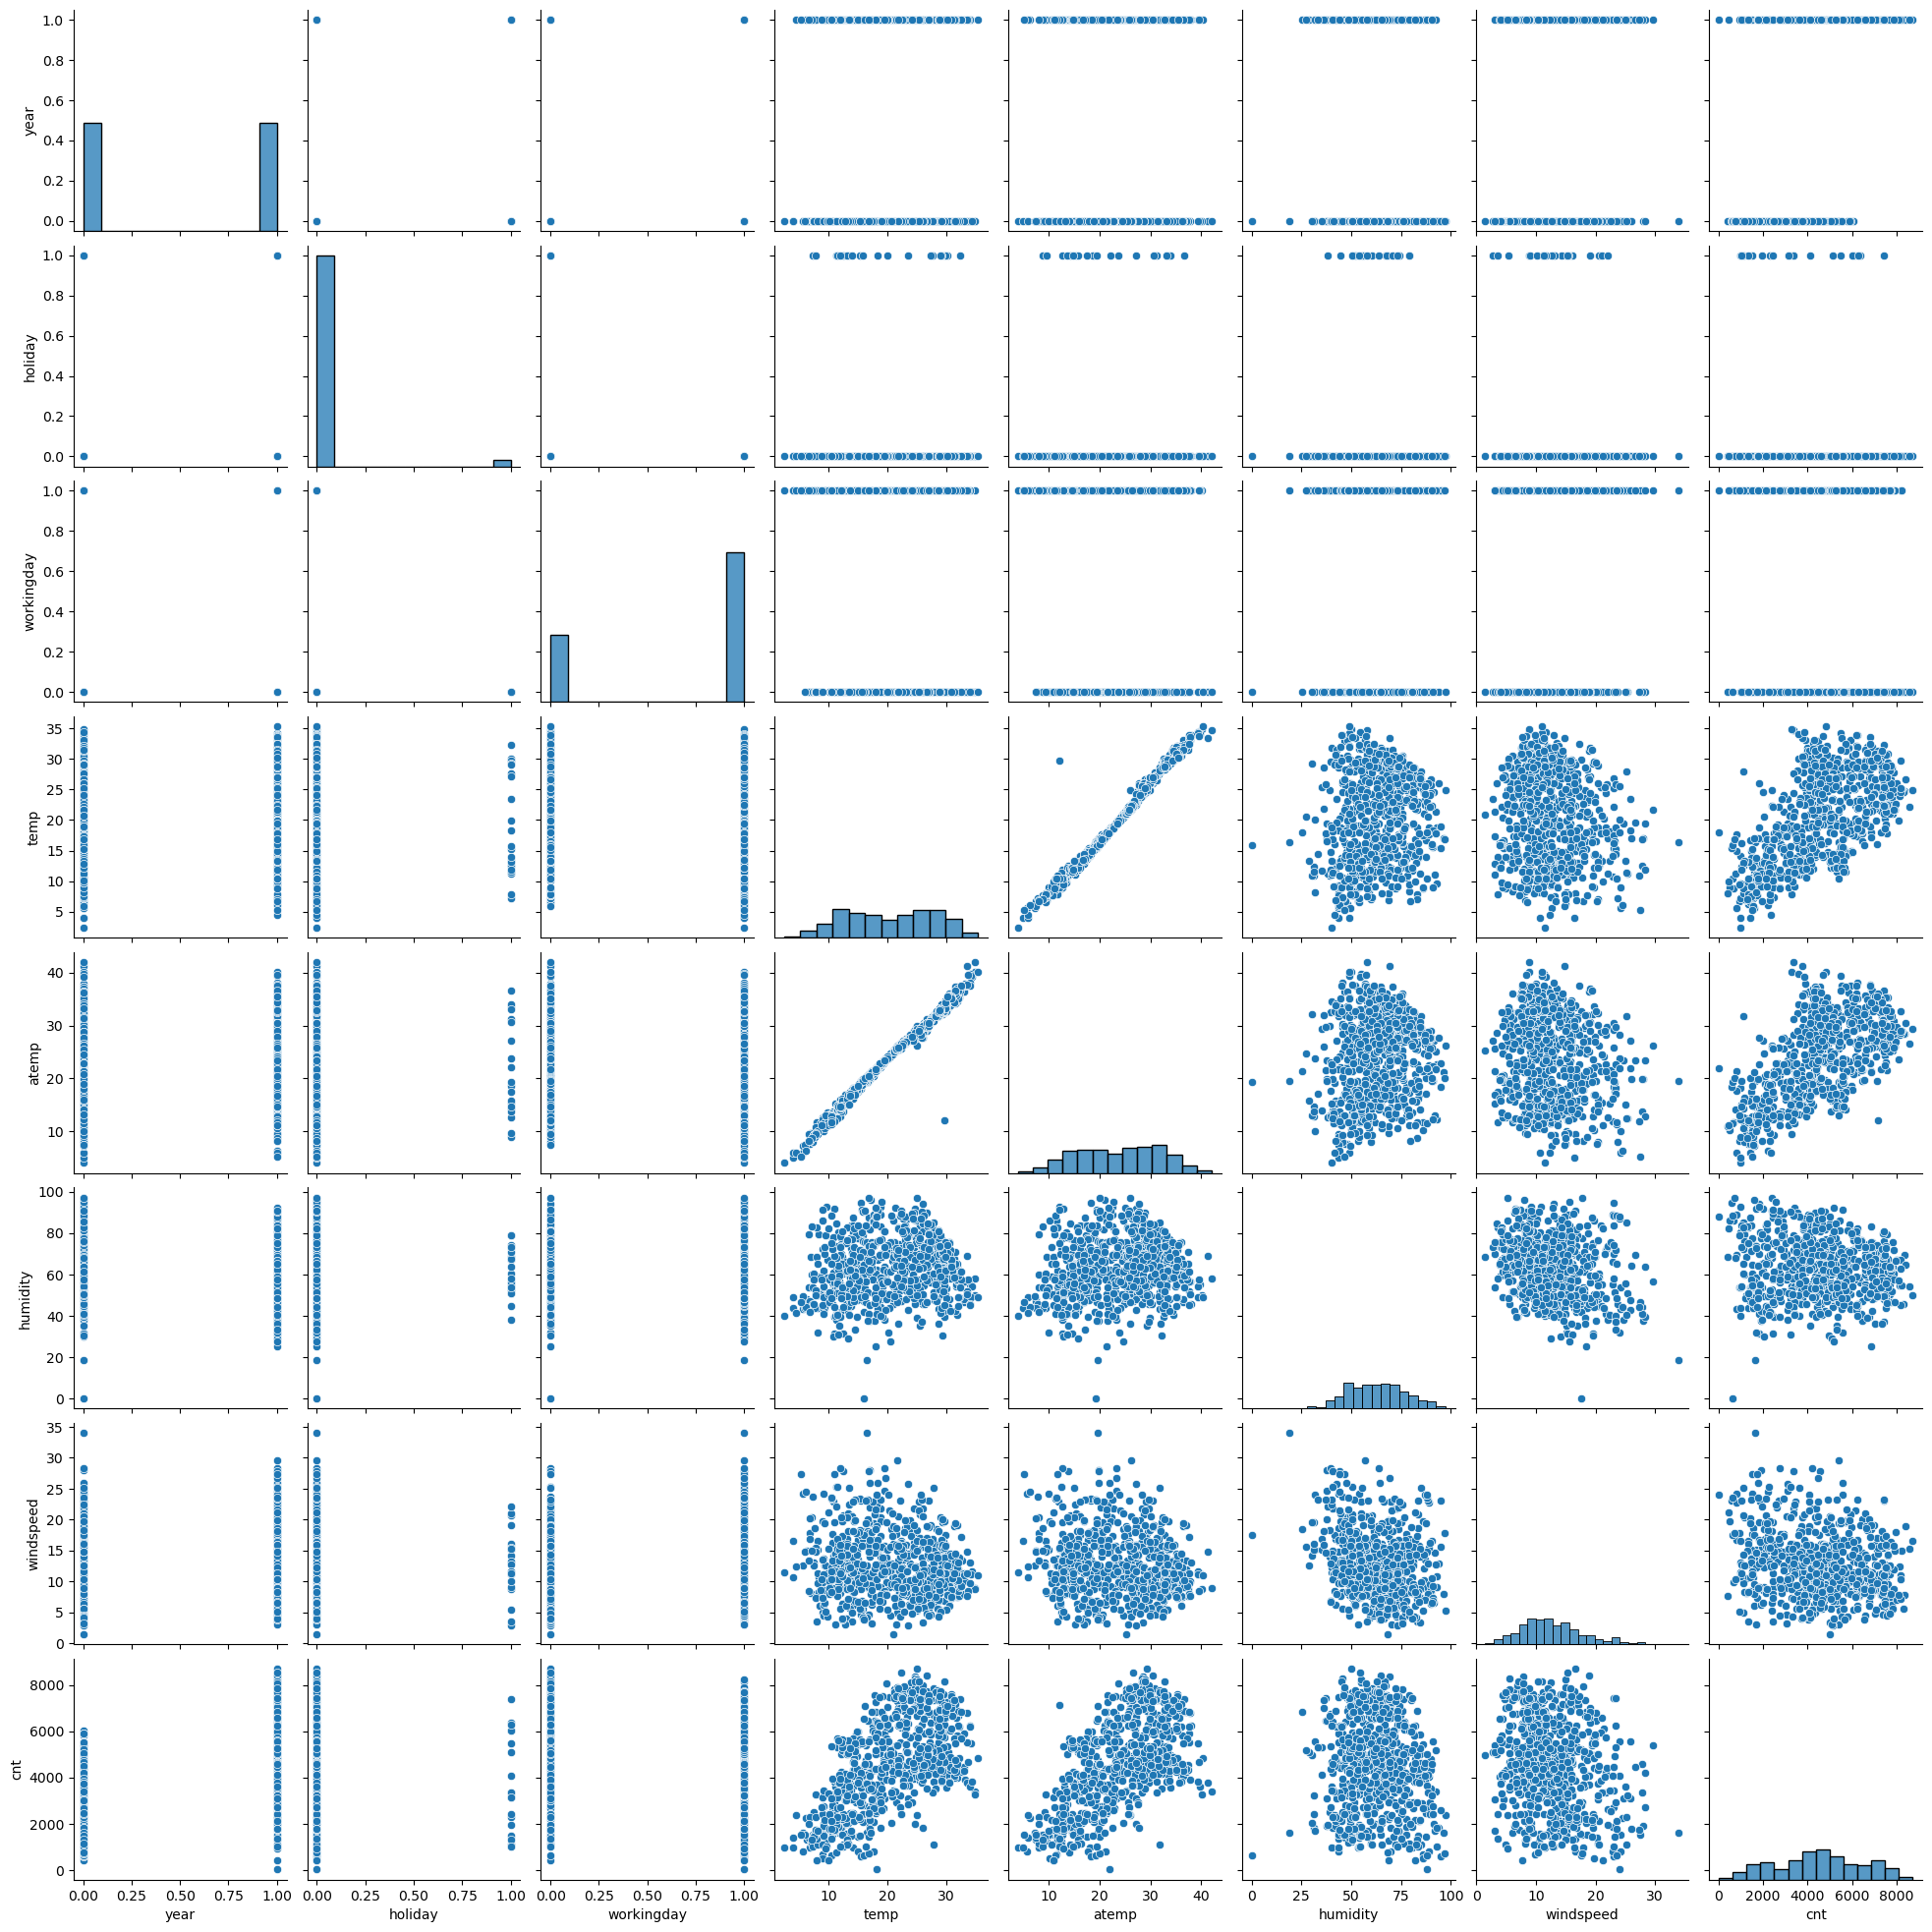

In [14]:
#visualizing the data
sns.pairplot(bike)
plt.show()

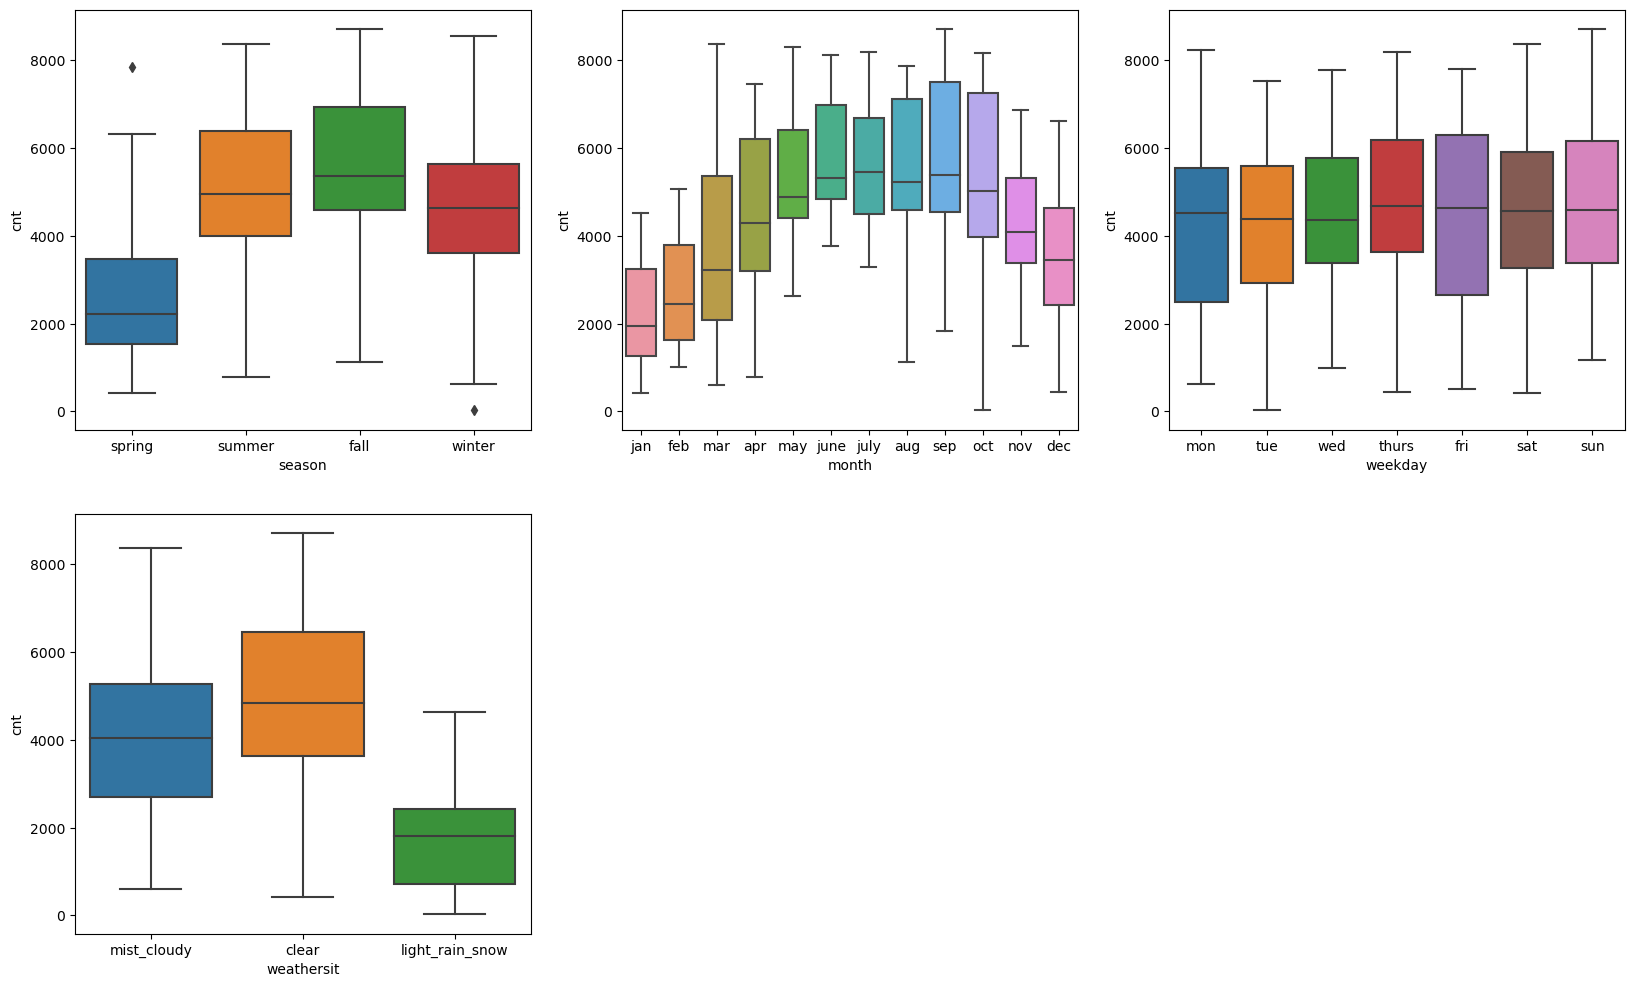

In [15]:
#visualizing the categorical variables against the target variable

plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='month',y='cnt',data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=bike)

plt.show()

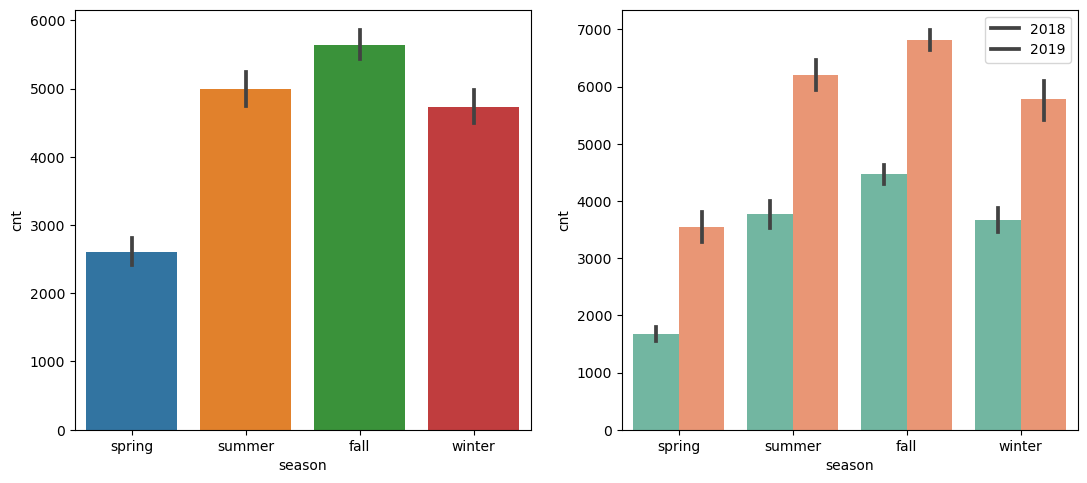

In [16]:
# checking the demand for these bikes YoY

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='season',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.barplot(x='season',y='cnt',hue='year',palette='Set2',data=bike)
plt.legend(labels=['2018','2019'])
plt.show()

- It can be observed that 'Fall' have the high count of bike rented on seasonal basis in both the years 2018 and 2019.
- Bookings went up significantly in the from year 2018 to year 2019

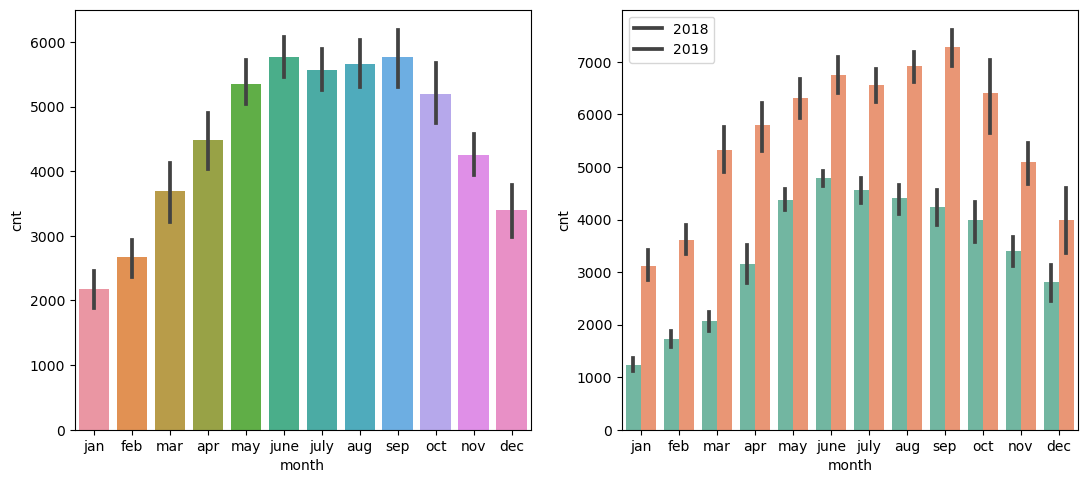

In [17]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='month',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.barplot(x='month',y='cnt',hue='year',palette='Set2',data=bike)
plt.legend(labels=['2018','2019'])
plt.show()

- It can be observed that the most number of bookings are done in the month of JUne and September 
- If we observe YoY we can see that 
    - in year 2018, month of June had the most bookings
    - in year 2019, month of September had the most bookings
- We can observe a trend, where the bookings start increasing Month on Month till mid of the year and then it starts to drop towards the end of the year.
- Year on Year bookings have increased 

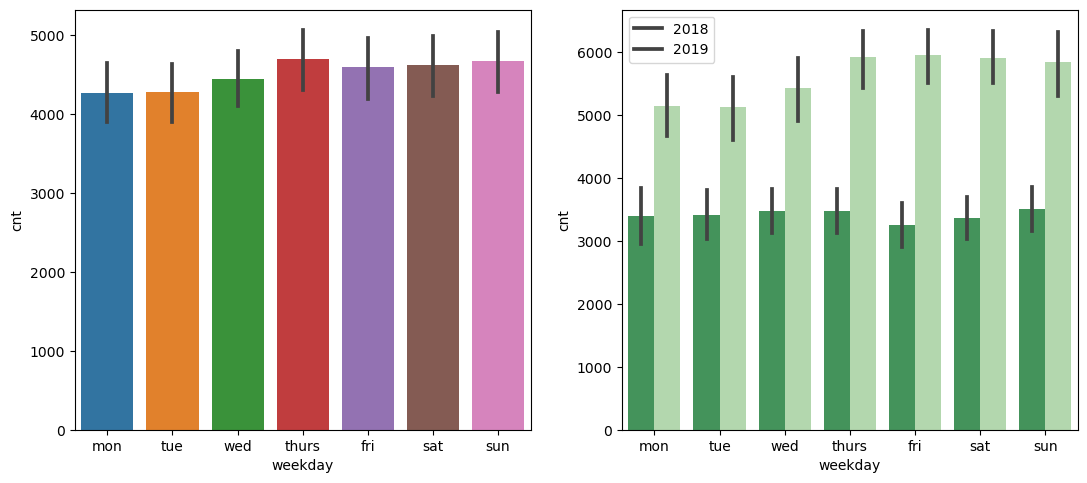

In [18]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.barplot(x='weekday',y='cnt',hue='year',palette='Greens_r',data=bike)
plt.legend(labels=['2018','2019'])
plt.show()

- We can observed that the end of the week has more bookings as compared to the start of the week

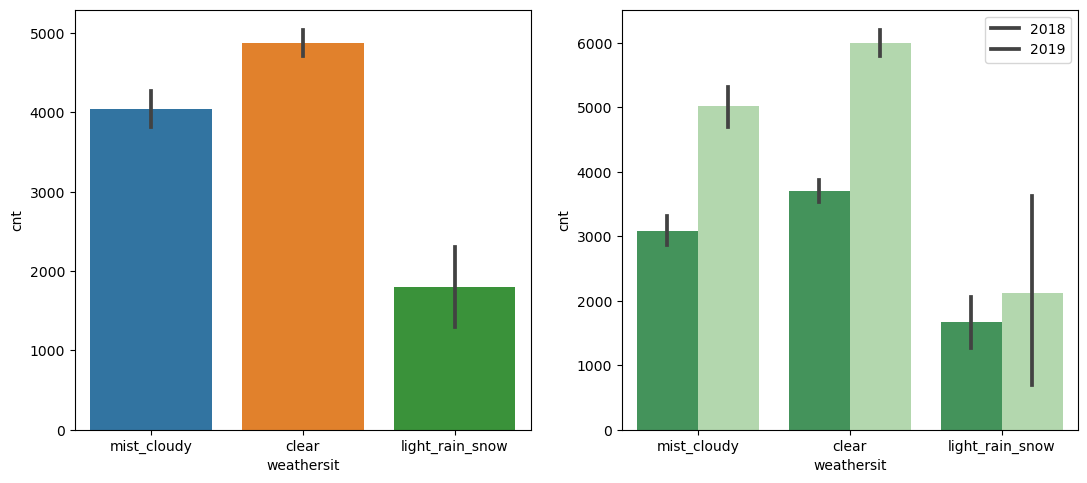

In [19]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='weathersit',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.barplot(x='weathersit',y='cnt',hue='year',palette='Greens_r',data=bike)
plt.legend(labels=['2018','2019'])
plt.show()

- Most bookings were done when the weather was clear 
- Least bookings were done when there was light rain/snow
- 2019 had significant increase in bookings in every weather as compared to 2018

### Data preparation

In [20]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


- We'll create dummy variables for columns with categorical values i.e, 'season', 'month', 'weekday', 'weathersit'

In [21]:
#creating dummy variable

season = pd.get_dummies(bike['season'], drop_first=True)

we don't need 4 columns. we can drop the first column, as the type of season can be identified with just the last threem columns where — 
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`
- `000` will correspond to `fall`

In [22]:
season.sample(10)

,spring,summer,winter
19,1,0,0
503,0,1,0
614,0,0,0
645,0,0,1
524,0,1,0
120,0,1,0
525,0,1,0
50,1,0,0
544,0,0,0
236,0,0,0


In [23]:
#adding the dummy variables to bike dataframe

bike = pd.concat([bike,season], axis=1)

In [24]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [25]:
# dropping the season column 
bike.drop(['season'], axis=1, inplace=True)

In [26]:
#creating dummy variable for weekday
weekday = pd.get_dummies(bike['weekday'], drop_first=True)

In [27]:
weekday.sample(10)

,mon,sat,sun,thurs,tue,wed
625,0,0,0,0,0,1
194,0,1,0,0,0,0
632,0,0,0,0,0,1
685,0,0,1,0,0,0
460,0,1,0,0,0,0
433,0,0,1,0,0,0
656,0,1,0,0,0,0
412,0,0,1,0,0,0
91,1,0,0,0,0,0
222,0,1,0,0,0,0


we don't need 7 columns. we can drop the first column, as the type of weekday
can be identified with just the six columns where — 
- `100000` will correspond to `mon`
- `010000` will correspond to `sat`
- `001000` will correspond to `sun`
- `000100` will correspond to `thurs`
- `000010` will correspond to `tue`
- `000001` will correspond to `wed`
- `000000` will correspond to `fri`

In [28]:
# adding weekday dummy variables to dataframe

bike = pd.concat([bike, weekday], axis=1)

In [29]:
bike.head()

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,mon,sat,sun,thurs,tue,wed
0,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0
2,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,0,jan,0,thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0


In [30]:
#dropping weekday column
bike.drop(['weekday'],axis=1,inplace=True)

In [31]:
bike.head()

,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,spring,summer,winter,mon,sat,sun,thurs,tue,wed
0,0,jan,0,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,jan,0,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0
2,0,jan,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,0,jan,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,jan,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0


In [32]:
#creating dummy variable for month
month_dummy = pd.get_dummies(bike['month'], drop_first=True)

In [33]:
month_dummy.head(12)

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0


we don't need 12 columns. we can drop the first column, as the type of month can be identified with just the 11 columns 

In [34]:
# addding the dummy variables to the bike df

bike = pd.concat([bike,month_dummy], axis=1)

In [35]:
bike.head()

,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,jan,0,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [36]:
#dropping the month column
bike.drop(['month'],axis=1,inplace=True)

In [37]:
#creating dummy variable for weathersit
weather_dummy = pd.get_dummies(bike['weathersit'], drop_first=True)

In [38]:
weather_dummy.head()

,light_rain_snow,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [39]:
# addding the dummy variables to the bike df

bike = pd.concat([bike,weather_dummy], axis=1)

In [40]:
bike.drop(['weathersit'],axis=1,inplace=True)

In [41]:
#Final Bike dataset
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,jan,july,june,mar,may,nov,oct,sep,light_rain_snow,mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


### Splitting Dataset into Training and Testing datasets

In [42]:
# so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

Now we'll rescale the features, as we can see columns `temp`,`atemp`,`humidity`,`windspeed`,`cnt` have high values 

In [43]:
## Using MinMax scaling

scaler = MinMaxScaler()

In [44]:
# Applying scaler() to all the columns except the '1-0' and 'dummy' variables

vars = ['temp','atemp','humidity','windspeed','cnt']

df_train[vars] = scaler.fit_transform(df_train[vars])

In [45]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,jan,july,june,mar,may,nov,oct,sep,light_rain_snow,mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   humidity         510 non-null    float64
 6   windspeed        510 non-null    float64
 7   cnt              510 non-null    float64
 8   spring           510 non-null    uint8  
 9   summer           510 non-null    uint8  
 10  winter           510 non-null    uint8  
 11  mon              510 non-null    uint8  
 12  sat              510 non-null    uint8  
 13  sun              510 non-null    uint8  
 14  thurs            510 non-null    uint8  
 15  tue              510 non-null    uint8  
 16  wed              510 non-null    uint8  
 17  aug            

In [47]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,jan,july,june,mar,may,nov,oct,sep,light_rain_snow,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


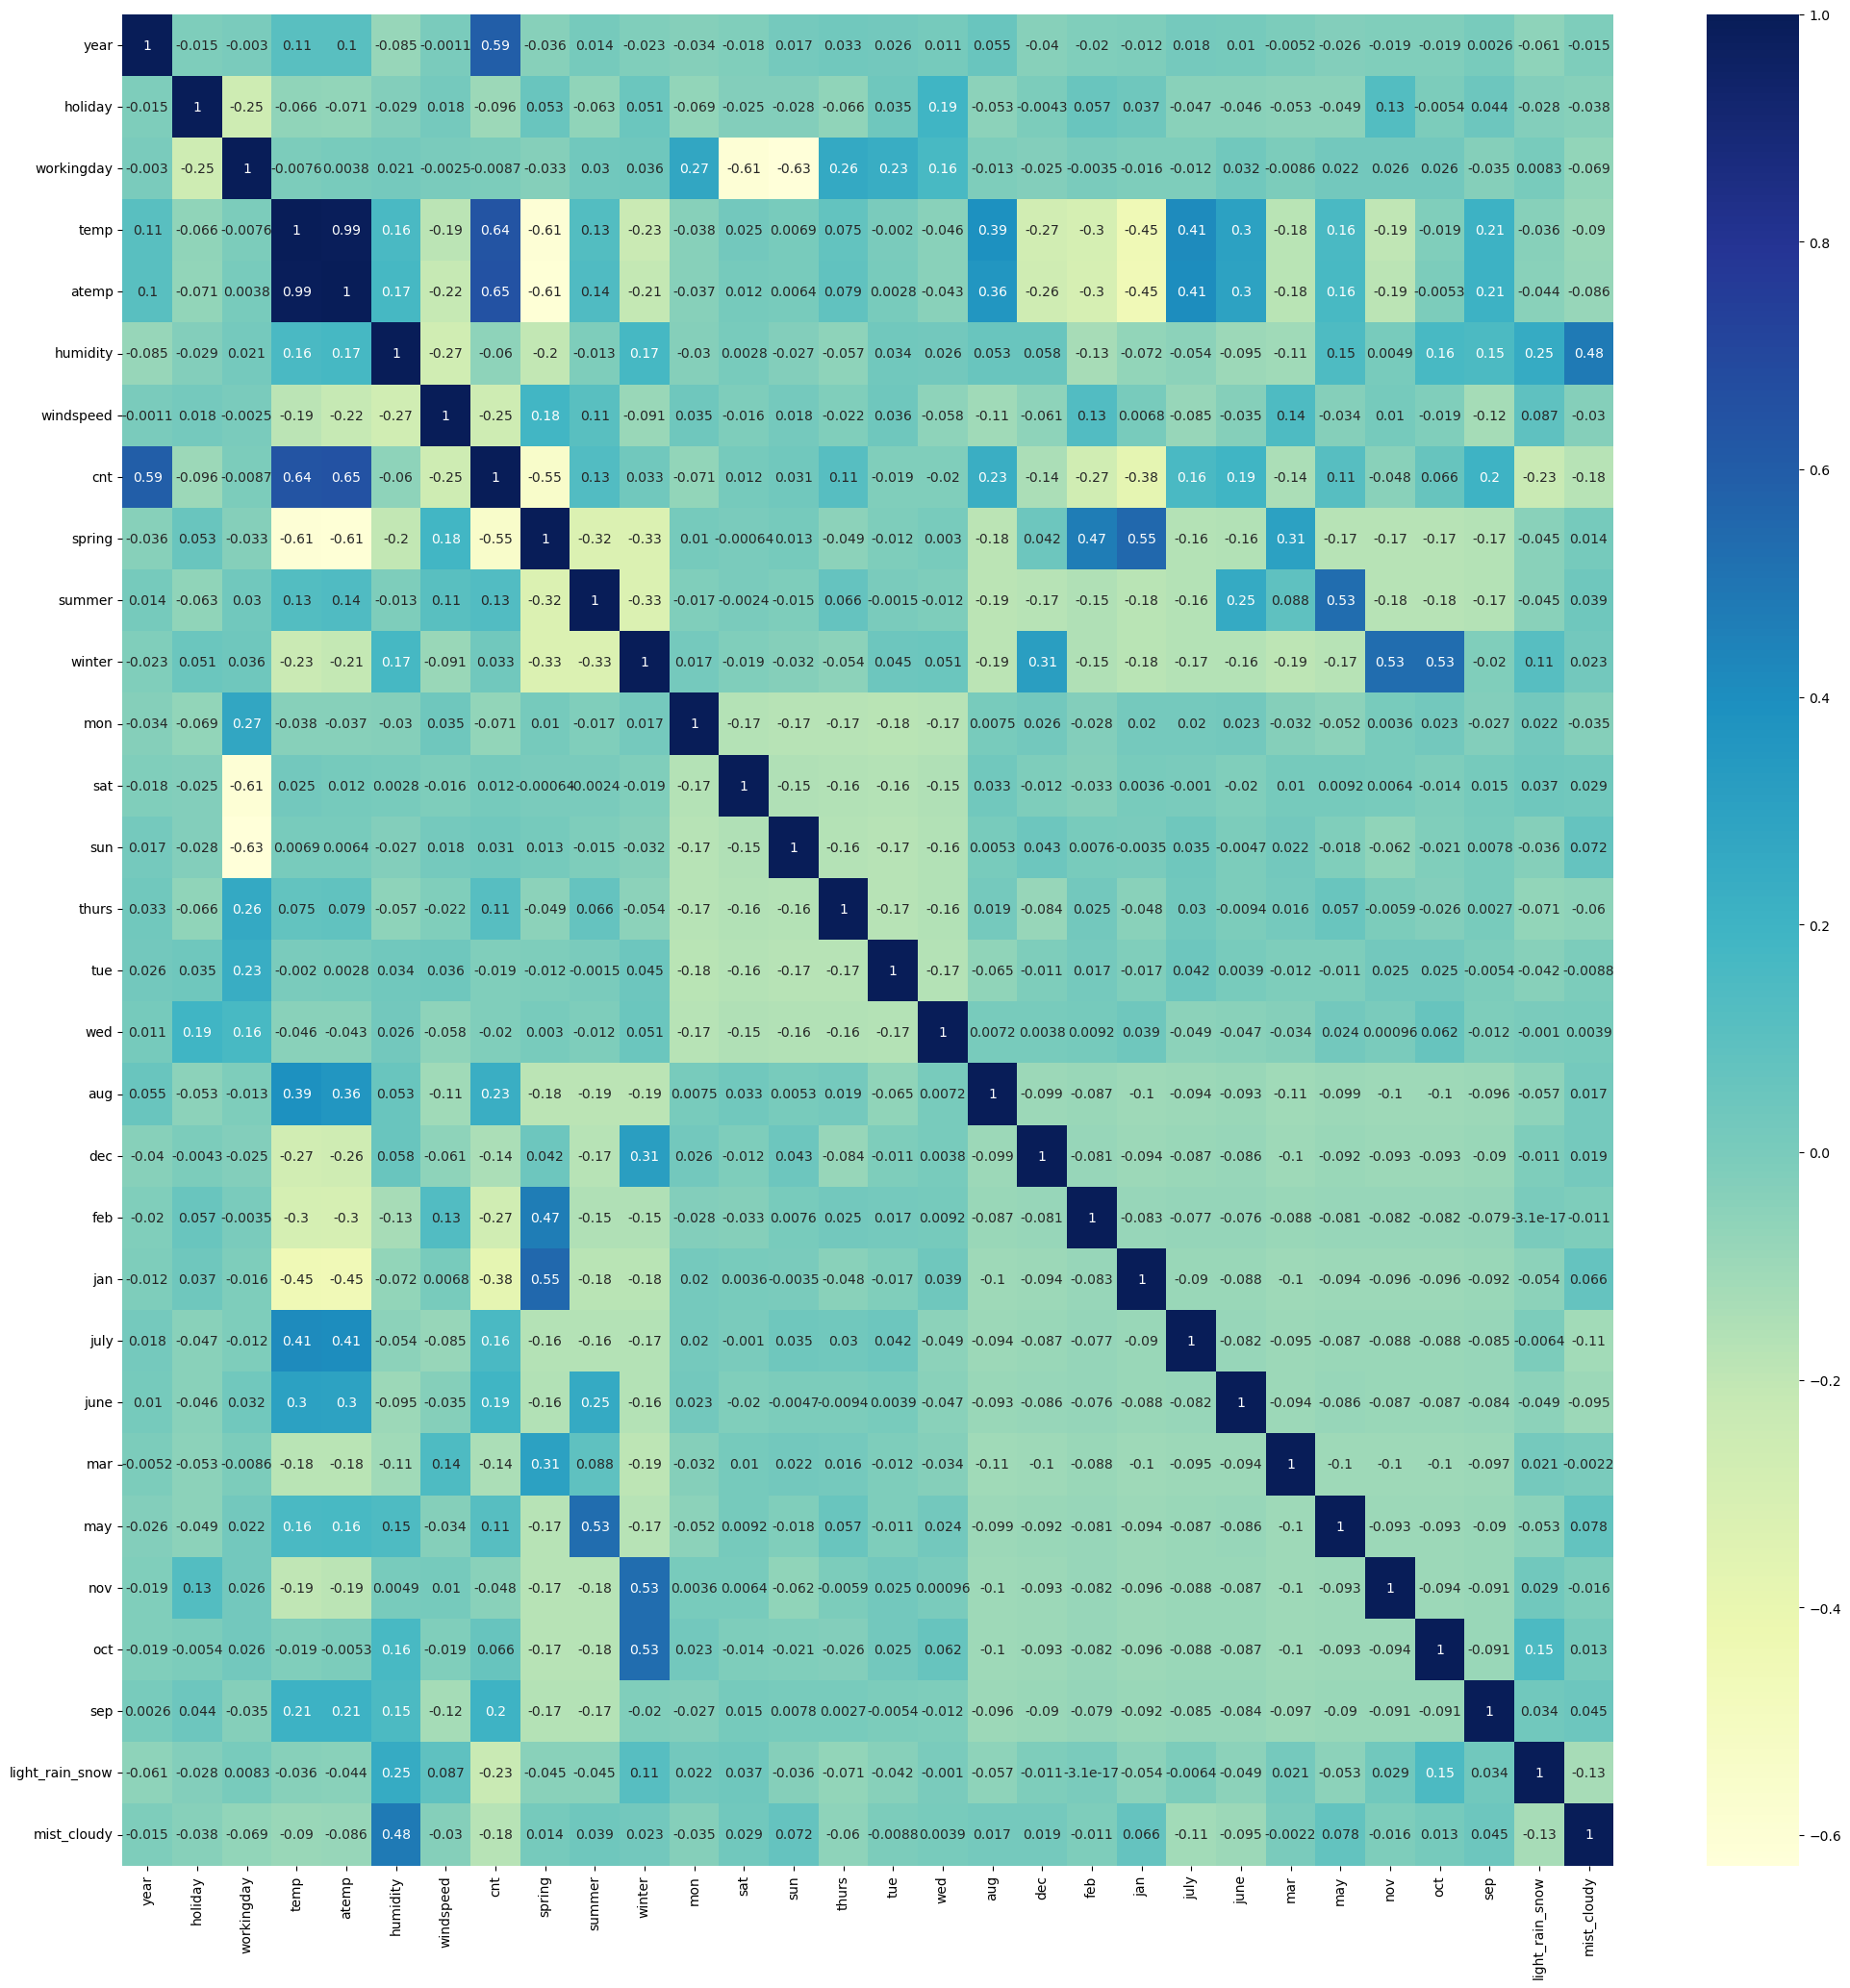

In [48]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cbar=True, cmap='YlGnBu')
plt.show()

- It can be observed that the `cnt` has correlation with `year`,`temp`, and `atemp`
- `Humidity` shows correlation with `mist_cloudy`
- `Summer` shows corr with `May` and `June`
- `Spring` shows corr with `Jan`, `March`, `feb`
- `Winter` shows corr with `nov`, `oct` and `dec`


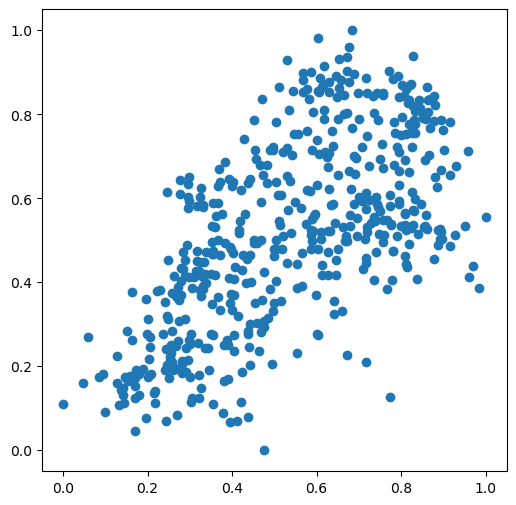

In [49]:
# It seems temp is correlated with cnt the most
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

- Confirms +ve correlation between `temp` and `cnt`

In [50]:
#Building linear regression model
#diving into X and Y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [51]:
#using RFE - Recursive Feature Elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=16)

rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 8),
 ('sat', False, 3),
 ('sun', False, 4),
 ('thurs', False, 12),
 ('tue', False, 7),
 ('wed', False, 10),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('light_rain_snow', True, 1),
 ('mist_cloudy', True, 1)]

In [53]:
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'feb', 'jan', 'july', 'nov', 'sep', 'light_rain_snow',
       'mist_cloudy'],
      dtype='object')

In [54]:
#columns rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mon', 'sat', 'sun', 'thurs', 'tue', 'wed',
       'aug', 'june', 'mar', 'may', 'oct'],
      dtype='object')

In [55]:
#building lr model using stats model for better statistics
#creating train model using RFE selected column
X_train_rfe = X_train[selected_col]

In [56]:
#adding a constant variable
X_train_1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train, X_train_1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.15e-188
Time:                        23:02:24   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3320      0.037     

In [57]:
# Feb has a very high P-value, so we'll drop the column 
X_train_rfe.drop('feb',axis=1,inplace=True)

In [58]:
#creating second model
#adding a constant variable
X_train_2 = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 01 May 2023   Prob (F-statistic):          3.34e-189
Time:                        23:02:24   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036     

In [59]:
#dropping 'dec'
X_train_rfe.drop('dec', axis=1, inplace=True)

In [60]:
#creating third model
#adding a constant variable
X_train_3 = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.25e-189
Time:                        23:02:25   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3030      0.035     

In [61]:
#dropping 'jan'
X_train_rfe.drop('jan', axis=1, inplace=True)

In [62]:
#creating fourth model
#adding a constant variable
X_train_4 = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 01 May 2023   Prob (F-statistic):          9.74e-190
Time:                        23:02:25   Log-Likelihood:                 510.48
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     496   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2909      0.035     

In [63]:
#dropping 'nov'
X_train_rfe.drop('nov', axis=1, inplace=True)

In [64]:
#creating fifth model
#adding a constant variable
X_train_5 = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train, X_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.69e-190
Time:                        23:02:25   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [65]:
def VIF_calc(X):  
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [66]:
VIF_calc(X_train_rfe)

,Features,VIF
3,humidity,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
11,mist_cloudy,2.28
0,year,2.08
8,july,1.58
9,sep,1.38


In [67]:
#dropping 'humidity' owing to high VIF
X_train_rfe.drop('humidity', axis=1, inplace=True)

In [68]:
#creating sixth model
#adding a constant variable
X_train_6 = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train, X_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.40e-187
Time:                        23:02:26   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1996      0.030     

In [69]:
#dropping 'july' owing to high p-value
X_train_rfe.drop('july', axis=1, inplace=True)

In [70]:
#creating seventh model
#adding a constant variable
X_train_7 = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train, X_train_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 01 May 2023   Prob (F-statistic):          7.36e-187
Time:                        23:02:26   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1910      0.030     

In [71]:
VIF_calc(X_train_rfe)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
9,mist_cloudy,1.54
7,sep,1.23
8,light_rain_snow,1.08
1,holiday,1.04


- VIF values look goos as all of them are <5.

In [72]:
#dropping 'spring' owing to high p-value

X_train_rfe.drop('spring', axis=1, inplace=True)

In [73]:
#creating eighth model
#adding a constant variable
X_train_8 = sm.add_constant(X_train_rfe)
lm_8 = sm.OLS(y_train, X_train_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.37e-186
Time:                        23:02:26   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1264      0.017     

In [74]:
VIF_calc(X_train_rfe)

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,year,2.00
4,summer,1.56
8,mist_cloudy,1.48
5,winter,1.38
6,sep,1.20
7,light_rain_snow,1.08
1,holiday,1.03


- p-values are `0.00` which is less than 0.05, it suggests that the corresponding independent variables are statistically significant
- None of the VIF values exceed 5, which suggests that there is low multicollinearity in the model.
- The F-statistic is `272.9`, and the p-value is `1.37e-186`, which is virtually zero. This indicates strong evidence against the null hypothesis, and suggests that the regression model is significant in explaining the variation in the dependent variable.
- Keeping the above points in mind, we can consider the model `lm_8` as our final model

### Residual Analysis of the Training Data

- Now that we have our model, we'll check if errror terms are normally distributed 

In [75]:
y_train_cnt = lm_8.predict(X_train_8)

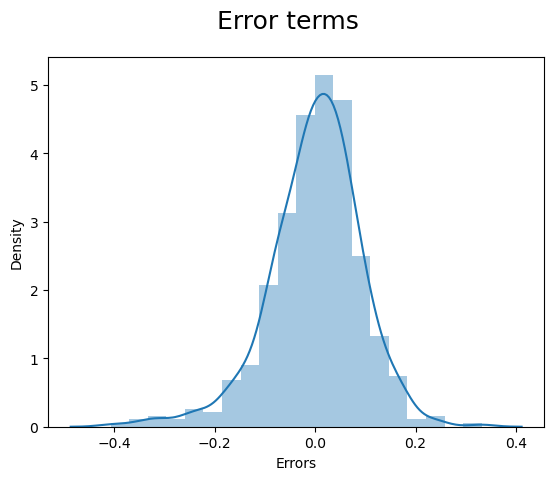

In [76]:
fig = plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20),
fig.suptitle('Error terms', size=18)
plt.xlabel('Errors', size=10)
plt.show()

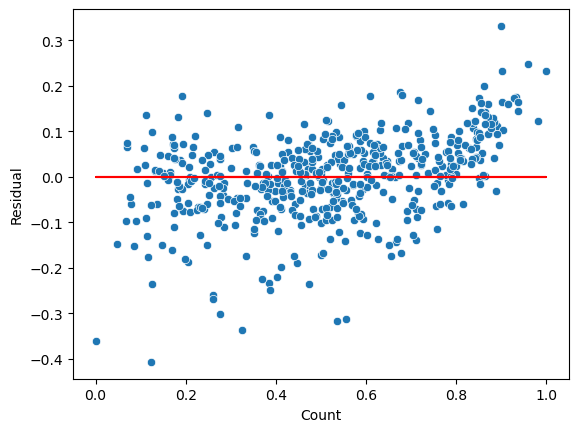

In [77]:
#Homoscedasticity
y_train_pred = lm_8.predict(X_train_8)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- Error terms are normally distributed

### Making Prediction

In [78]:
# applying scaling on test set

num_var = ['temp','atemp','humidity','windspeed','cnt']

df_test[num_var] = scaler.transform(df_test[num_var])

In [79]:
#Dividing into X_test and Y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [81]:
# Making predictions
y_pred = lm_8.predict(X_test_new)

## Model Evaluation

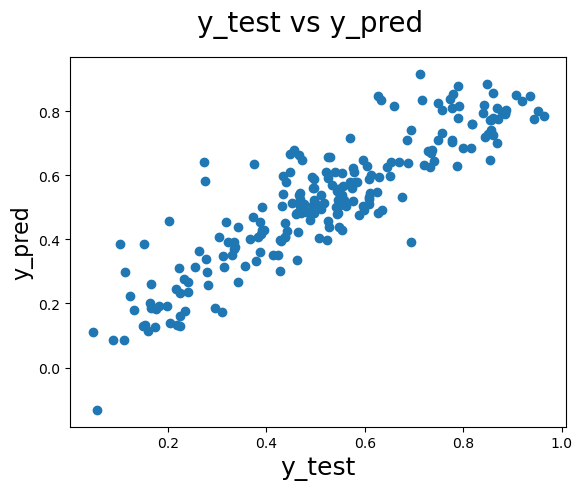

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)   
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.2328  \times  year - 0.0992  \times  holiday + 0.5480 \times temp - 0.1533 \times windspeed + 0.0868 \times summer + 0.1306 \times winter + 0.1011 \times sep - 0.2838 \times light_rain_snow - 0.0797 \times mistcloudy $

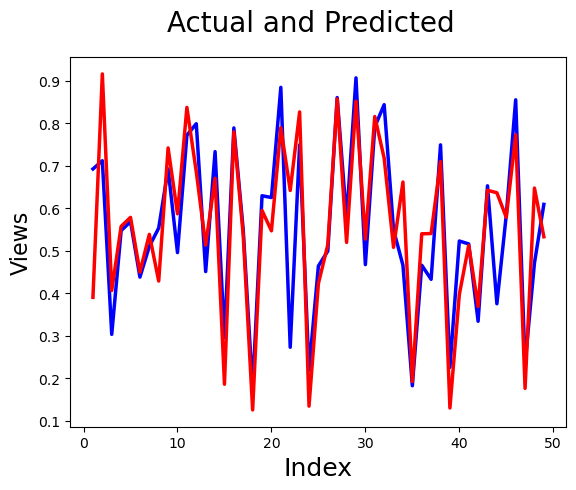

In [83]:
#checking for actual vs predicted
c = [i for i in range(1,50,1)]
fig = plt.figure()
plt.plot(c,y_test[:len(c)], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred[:len(c)], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 
plt.show()

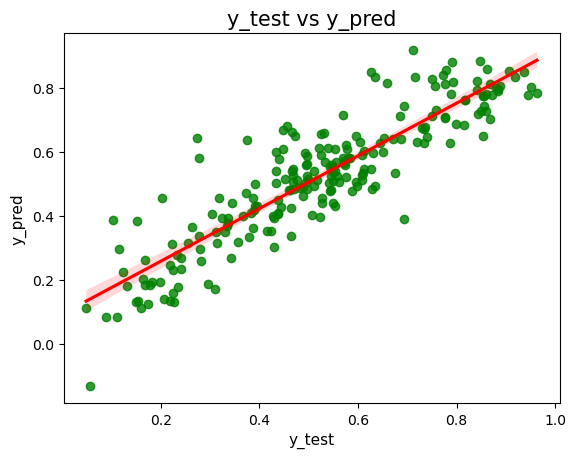

In [84]:
#visualizing the fit on test data using regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=11)
plt.ylabel('y_pred', fontsize=11)
plt.show()

- Which variables are significant in predicting the demand for shared bikes?
    - `temp`, `windspeed`, `year`, `summer`,`mist_cloudy`,`winter`,`sep`,`light_rain_snow`,`holiday` are significant in predicting the demand for shared bikes

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7938290016640652

- How well those variables describe the bike demands
    - The test set performance of the model can be evaluated using the R-squared value, which is 0.7938. This indicates that the model explains approximately 79.4% of the variation in the test set target variable based on the independent variables. Overall, the model seems to be a good fit for the data